# Figure 7: Switching between specialists is preferred adaptation strategy in highly correlated environments 

We consider that there is a generalist type which does relatively well in both environments. For uncorrelated switching of environments there is then going to be a regime of environmental frequencies for which it is optimal to have a population of generalist individuals. Here we explore numerically how this result generalizes for correlated environments.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['../transitions.mplstyle'])
import matplotlib
colors = matplotlib.rcParams['axes.prop_cycle'].by_key()['color']
black = matplotlib.rcParams['text.color']
from matplotlib import colors as mplcolors

import sys
sys.path.append('../lib/')
import evolimmune, analysis, plotting

In [2]:
df = analysis.loadnpz('data/opt.npz')

In [3]:
df['tauenv'] = evolimmune.to_tau(df['aenv'])
columns = ['alpha','beta', 'gamma', 'delta', 'epsilon', 'zeta']
df['pi1'] = df.apply(lambda row: evolimmune.steadystate3types([row[col] for col in columns])[0], axis=1)
df['pi2'] = df.apply(lambda row: evolimmune.steadystate3types([row[col] for col in columns])[1], axis=1)
df['pi3'] = df.apply(lambda row: evolimmune.steadystate3types([row[col] for col in columns])[2], axis=1)

In [4]:
varname_to_tex = dict(pi1='$\pi^\star(\sigma=1)$', pi2='$\pi^\star(\sigma=3)$', pi3='$\pi^\star(\sigma=2)$')

In [5]:
f11, f21, f31, f12, f22, f32 = df['f11'].mean(), df['f31'].mean(), df['f21'].mean(), df['f12'].mean(), df['f32'].mean(), df['f22'].mean()

/home/andreas/miniconda2/envs/transitions/lib/python2.7/site-packages/matplotlib/image.py:375: UserWarning: Images are not supported on non-linear axes.
  warnings.warn("Images are not supported on non-linear axes.")


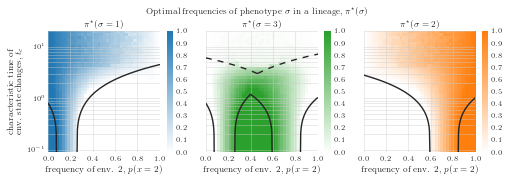

In [6]:
fig, axes = plt.subplots(ncols=3, figsize=(7, 2.4), sharex=True, sharey=True)
ymin, ymax = 0.09, 20.0
#boundarykwargs = dict(ylimmax=ymax, ylimmin=ymin, lw=7.5, color='w')
variables = ['pi1', 'pi2', 'pi3']
colororder = [0, 2, 1]
for counter, var in enumerate(variables):
    ax = axes[counter]
    ax.set_title(varname_to_tex[var])
    cmap = cmap = mplcolors.LinearSegmentedColormap.from_list('mycmap', ['w', colors[colororder[counter]]])
    im, cbar = plotting.heatmap(df.pivot(index='tauenv', columns='pienv', values=var),
                     imshow=True,
                     zlabel=None,
                     #zlabel=varname_to_tex[var],
                     cmap=cmap, ax=ax,
                     vmin=0.0, vmax=1.0,
                     interpolation='nearest')
    cbar.outline.set_linewidth(0.0)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(ymin, ymax)
    ax.grid(which='both', alpha=.5)
    ax.set_yscale('log')
    plotting.despine(ax, spines='all')

# analytical lines for 13, 32 boundaries
w1 = f31/f11
w2 = f12/f32
axes[0].plot(*evolimmune.plow(w1, w2, df.aenv.min()), c=black)
axes[0].plot(*evolimmune.phigh(w1, w2, df.aenv.min()), c=black)
axes[1].plot(*evolimmune.plow(w1, w2, df.aenv.min()), c=black)
axes[1].plot(*evolimmune.phigh(w1, w2, df.aenv.min(), 0.43), c=black)
w1 = f21/f31
w2 = f32/f22
axes[2].plot(*evolimmune.plow(w1, w2, df.aenv.min()), c=black)
axes[2].plot(*evolimmune.phigh(w1, w2, df.aenv.min()), c=black)
axes[1].plot(*evolimmune.plow(w1, w2, df.aenv.min(), 0.43), c=black)
axes[1].plot(*evolimmune.phigh(w1, w2, df.aenv.min()), c=black)

# approximate line above which pi(3) = 0 (from adiabatic limit)
def Gamma(w1, w2):
    return w2/(1.0-w2) + 1.0/(1.0-w1)
c = -np.log(f32/f22)/(np.log(Gamma(f31/f11, f12/f32)/Gamma(f21/f11, f12/f22))+np.log(Gamma(f12/f32, f31/f11)/Gamma(f12/f22, f21/f11)))
cstar = -np.log(f31/f11)/(np.log(Gamma(f21/f31, f32/f22)/Gamma(f21/f11, f12/f22))+np.log(Gamma(f32/f22, f21/f31)/Gamma(f12/f22, f21/f11)))
a = np.linspace(1-c-cstar, df.aenv.max())
p = 1.0 - c/(1.0-a)
axes[1].plot(p, evolimmune.to_tau(a), color=black, linestyle='--')
p = cstar/(1.0-a)
axes[1].plot(p, evolimmune.to_tau(a), color=black, linestyle='--')


axes[0].set_ylabel('characteristic time of \n env. state changes, $t_c$')
for ax in axes:
    ax.set_xlabel('frequency of env. 2, $p(x=2)$')
fig.suptitle(r'Optimal frequencies of phenotype $\sigma$ in a lineage, $\pi^\star(\sigma)$')
fig.tight_layout(pad=0.25, rect=(0.0, 0.0, 1.0, 0.92))
fig.savefig('../svgs/corr3type.svg')

**Switching between specialists is the preferred adaptation strategy in highly correlated environments even if a generalist phenotype is optimal in uncorrelated environments.**
        Here we generalize the results of Fig. 3D-F about transitions between switching, specialist, and single-phenotype generalist strategies by considering the influence of environmental correlation.
        The numerically determined optimal frequencies of different phenotypes $\pi^\star(\sigma)$ in a lineage are plotted as a function of $t_c$, the characteristic time scale of environmental changes, and $p(x=2)$, the fraction of the time the environment is in state 2.
        As a comparison we also show the analytical transition lines between single-phenotype and switching strategies(solid lines) and the approximate transition line above which switching takes place between the two specialist phenotypes (dashed lines).